# Description:
In this notebook a potential correlation between the waveform baselining and the ambient temperature was investigated using the environmental data from Grafana.

# Import modules:

In [1]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot
import datetime as dt
from datetime import datetime
import csv
#from datetime import datetime

In [2]:
%%capture out
%run ./Functions.ipynb

# Import data

In [3]:
File=uproot.open("/mnt/c/Users/Jethro/Desktop/Master thesis/RNO_DATA_DIR/station11/run101/combined.root")

In [4]:
RadiantData=File['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')
EventNumber=File['combined']['waveforms']['event_number'].array(library="np")
print(RadiantData.shape) #107 is for events, 24 channels & 2048 for each timestep
#np.where(EventNumber==18)[0][0]

(107, 24, 2048)


# Looking at temperature data

In [6]:
Name1, Time1, Temp1 = TemperatureData(1)
print(Name1)
print(Time1)
print(Temp1)

Ukaleq          (analog)    (analog) 1/18 : 94.25%
[datetime.datetime(2021, 6, 20, 14, 43, 8)
 datetime.datetime(2021, 6, 20, 14, 44, 8)
 datetime.datetime(2021, 6, 20, 14, 45, 8)
 datetime.datetime(2021, 6, 20, 14, 46, 22)
 datetime.datetime(2021, 6, 20, 14, 47, 8)
 datetime.datetime(2021, 6, 20, 14, 48, 21)
 datetime.datetime(2021, 6, 20, 14, 49, 8)
 datetime.datetime(2021, 6, 20, 14, 50, 22)
 datetime.datetime(2021, 6, 20, 14, 54, 8)
 datetime.datetime(2021, 6, 20, 14, 55, 8)
 datetime.datetime(2021, 6, 20, 14, 55, 22)
 datetime.datetime(2021, 6, 20, 14, 57, 8)
 datetime.datetime(2021, 6, 20, 14, 58, 8)
 datetime.datetime(2021, 6, 20, 14, 59, 8)
 datetime.datetime(2021, 6, 20, 15, 2, 8)
 datetime.datetime(2021, 6, 20, 15, 3, 8)
 datetime.datetime(2021, 6, 20, 15, 4, 8)
 datetime.datetime(2021, 6, 20, 15, 5, 8)
 datetime.datetime(2021, 6, 20, 15, 6, 8)
 datetime.datetime(2021, 6, 20, 15, 7, 8)
 datetime.datetime(2021, 6, 20, 15, 8, 8)
 datetime.datetime(2021, 6, 20, 15, 8, 21)
 datet

In [8]:
TempData=[]
for i in range(17):
    Name, Time, Temp = TemperatureData(i)
    TempData.append([Name,Time,Temp])

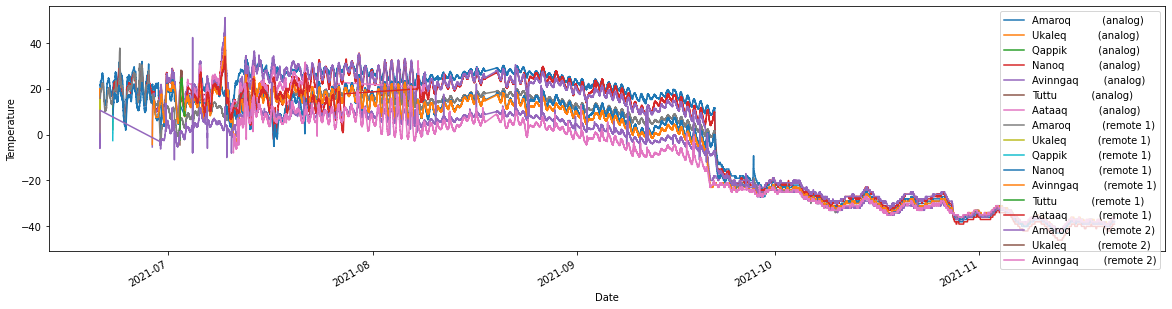

In [9]:
# make up some data
#x = [dt.datetime.strptime("2021-06-20 14:42:51",'%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=i) for i in range(12)]
sdate=dt.datetime.strptime("2021-06-20 14:42:51",'%Y-%m-%d %H:%M:%S')
edate=dt.datetime.strptime("2021-11-21 13:43:02",'%Y-%m-%d %H:%M:%S')
x=[sdate+dt.timedelta(days=x) for x in range((edate-sdate).days)]
y = [1 for i in x]
plt.figure(figsize=(20,5))
for i in range(len(TempData)):
# plot
    plt.plot(TempData[i][1],TempData[i][2], label=TempData[i][0])
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

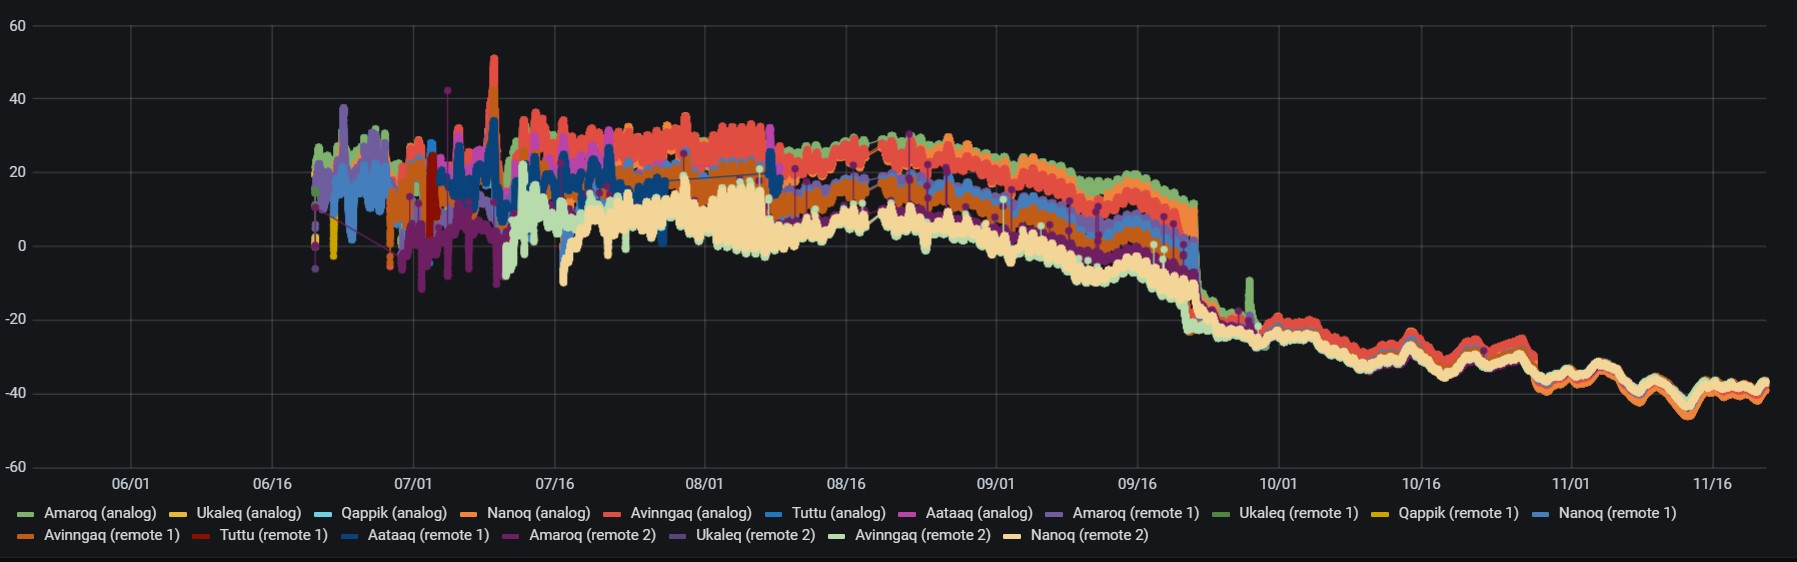

Station 11 run 101 time:
2021-07-31 06:38:34.504 ->	2021-07-31 08:38:18.738

In [10]:
StartRun=dt.datetime.strptime("2021-07-31 06:38:34", '%Y-%m-%d %H:%M:%S')
EndRun=dt.datetime.strptime("2021-07-31 08:38:18", '%Y-%m-%d %H:%M:%S')

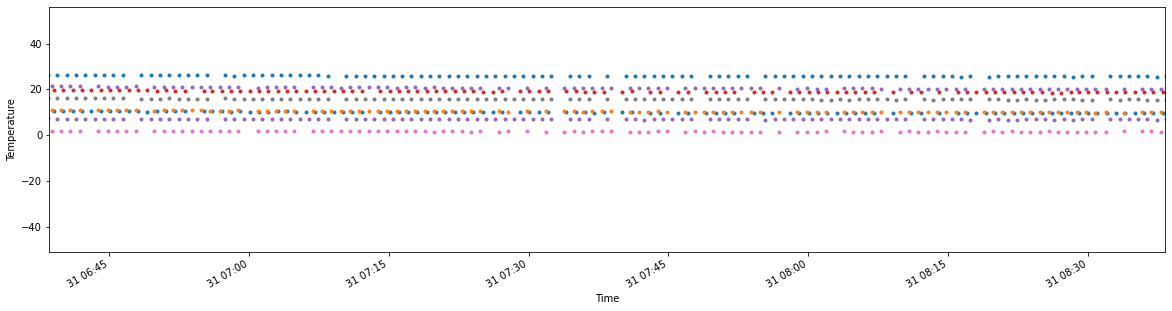

In [11]:
plt.figure(figsize=(20,5))
for i in range(len(TempData)):
# plot
    plt.plot(TempData[i][1],TempData[i][2],'.', label=TempData[i][0])
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Temperature")
#plt.legend()
plt.xlim([StartRun,EndRun])
plt.show()

The temperature appears to be constant along the duration of the run.